<a href="https://colab.research.google.com/github/PAHNABIROY/imageprocessing/blob/main/Copy_of_Spheroid_project_using_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

new project spheroid

In [5]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 8.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [6]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image



In [7]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.74M/6.74M [00:00<00:00, 107MB/s]


In [8]:
#Withut this Colab is giving an error when installing Roboflow
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [1]:
#!pip install roboflow --quiet
#%cd /content/


# To hide your API key from others, you can use getpass
#from getpass import getpass
#token = getpass('Enter Token Here') #I stored my token in a file on my Google Drive. I will enter it when prompted here.


# Import your data from Roboflow
"""
from roboflow import Roboflow
rf = Roboflow(api_key=token)
project = rf.workspace("python-for-microscopists-nceyk").project(")
dataset = project.version(2).download("yolov8")
"""
#Change the working directory to the downloaded data directory and check the yaml file.
#%cd /content/your_dataset

'\nfrom roboflow import Roboflow\nrf = Roboflow(api_key=token)\nproject = rf.workspace("python-for-microscopists-nceyk").project(")\ndataset = project.version(2).download("yolov8")\n'

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/data.yaml

train: /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/train/images
val: /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/valid/images
test: ../test/images

nc: 1
names: ['spheroid']

roboflow:
  workspace: pahnabi
  project: spheroid_segmentation
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/pahnabi/spheroid_segmentation/dataset/2

In [ ]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [ ]:
# Train the model
results = model.train(data='/content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/data.yaml',
                      project=project,
                      name=name,
                      epochs=200,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/data.yaml, epochs=200, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results, name=200_epochs-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False

100%|██████████| 755k/755k [00:00<00:00, 4.30MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 21.3MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/train/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results/200_epochs-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results/200_epochs-2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      1/200      1.17G      1.058      3.052      3.298      1.122          8        800: 100%|██████████| 12/12 [00:13<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         12         12    0.00333          1      0.542      0.536    0.00333          1      0.542      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.17G     0.9583      1.761      2.815      1.079          8        800: 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         12         12    0.00333          1      0.995      0.907    0.00333          1      0.995      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.18G     0.5879      1.041      1.786     0.9078         10        800: 100%|██████████| 12/12 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         12         12      0.962          1      0.995      0.892      0.962          1      0.995      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200       1.3G     0.6324     0.6894      1.701     0.9323          5        800: 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         12         12    0.00408          1      0.995      0.915    0.00408          1      0.995      0.984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.17G     0.6764      0.799       1.68      0.984          6        800: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         12         12      0.987          1      0.995      0.864      0.987          1      0.995      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.18G     0.5862     0.7231      1.684     0.9313          9        800: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         12         12      0.994          1      0.995      0.943      0.994          1      0.995      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.19G     0.6167     0.5979      1.544     0.9255          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         12         12      0.994          1      0.995      0.943      0.994          1      0.995      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.19G     0.6425     0.7569      2.021     0.9955          5        800: 100%|██████████| 12/12 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         12         12      0.983          1      0.995      0.852      0.983          1      0.995      0.897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.17G     0.7801     0.7838      2.144      1.013          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         12         12      0.977          1      0.995      0.904      0.977          1      0.995      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.31G     0.8985     0.7531      2.589      1.057          7        800: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.86it/s]

                   all         12         12      0.299      0.833      0.375      0.211      0.299      0.833      0.375      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.16G      1.025     0.8531      2.489      1.084          8        800: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12         12      0.299      0.833      0.375      0.211      0.299      0.833      0.375      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.17G     0.8741     0.8371      2.525      1.064          8        800: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         12         12      0.783      0.917      0.947      0.497      0.783      0.917      0.947      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.19G     0.8165     0.6913      1.973      0.973          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         12         12          1          1      0.995       0.73          1          1      0.995      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.19G     0.7947     0.6778      1.769     0.9697         12        800: 100%|██████████| 12/12 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         12         12      0.955          1      0.995       0.78      0.955          1      0.995      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.16G     0.7243     0.4653      1.653      1.016          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         12         12      0.955          1      0.995       0.78      0.955          1      0.995      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.31G     0.6679     0.5505      1.727     0.9508          6        800: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         12         12      0.911          1      0.995      0.847      0.911          1      0.995      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200       1.3G     0.6581     0.9243      1.651     0.9793         10        800: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         12         12      0.978          1      0.995      0.904      0.978          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.18G     0.6453     0.6462      1.553     0.9308          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all         12         12      0.991          1      0.995      0.926      0.991          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.17G     0.7011     0.7081      1.687     0.9612          5        800: 100%|██████████| 12/12 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         12         12      0.991          1      0.995      0.926      0.991          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.31G     0.6459     0.6501      1.544     0.9775          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         12         12       0.99          1      0.995      0.831       0.99          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.29G     0.6356     0.5134      1.519     0.9282          8        800: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         12         12      0.995          1      0.995      0.916      0.995          1      0.995      0.984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.32G     0.6788     0.5258      1.342     0.9404          8        800: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         12         12      0.996          1      0.995       0.96      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.18G     0.6507     0.6519       1.26      0.957          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         12         12      0.996          1      0.995       0.96      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.31G     0.6206     0.5216      1.224     0.9052          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         12         12      0.996          1      0.995       0.89      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.18G     0.5945     0.6152      1.178     0.9066          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         12         12      0.996          1      0.995       0.93      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.17G     0.6482     0.6955      1.266     0.9394          8        800: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         12         12      0.995          1      0.995      0.921      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.31G     0.6102     0.6036      1.245     0.9416          8        800: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]


                   all         12         12      0.995          1      0.995      0.921      0.995          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.19G     0.5336     0.5197      1.091     0.9226          9        800: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all         12         12      0.995          1      0.995      0.908      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.19G     0.5183     0.3861      1.128      0.914          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         12         12      0.996          1      0.995      0.934      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.17G     0.6033     0.5988      1.135      0.946          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         12         12      0.995          1      0.995      0.963      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.18G     0.4444      0.546      1.049     0.8778          5        800: 100%|██████████| 12/12 [00:01<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         12         12      0.995          1      0.995      0.963      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.29G     0.5186     0.7191     0.9394     0.8733          5        800: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.17G     0.5186     0.5661      1.003     0.8822          7        800: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         12         12      0.996          1      0.995       0.98      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200       1.3G     0.4834     0.5079     0.9937     0.8739          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         12         12      0.996          1      0.995      0.971      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.31G     0.4699     0.5056     0.8804     0.8301          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         12         12      0.996          1      0.995      0.971      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200       1.2G     0.5631     0.5768      1.068     0.9021          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200       1.3G     0.5583     0.5223       0.97     0.8962          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         12         12      0.996          1      0.995      0.902      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.18G     0.4807     0.4421      0.795     0.8736          6        800: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]


                   all         12         12      0.996          1      0.995      0.926      0.996          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.16G     0.5062     0.5114     0.8719     0.9176          5        800: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         12         12      0.996          1      0.995      0.926      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.32G     0.4272      0.503     0.7997     0.8781          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         12         12      0.996          1      0.995       0.93      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.18G     0.4997     0.4341     0.8372     0.8847          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         12         12      0.996          1      0.995      0.926      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.18G     0.4909     0.4175     0.8079     0.8713          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         12         12      0.996          1      0.995      0.936      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.29G     0.3986     0.3935     0.7596     0.8406          8        800: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all         12         12      0.996          1      0.995      0.936      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.16G     0.4967     0.6043     0.9282     0.9421          8        800: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]


                   all         12         12      0.996          1      0.995      0.942      0.996          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200       1.3G     0.4156     0.4002      0.786     0.8584          4        800: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         12         12      0.996          1      0.995      0.937      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.31G     0.4446     0.5266     0.8122     0.9252          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         12         12      0.996          1      0.995      0.961      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.18G     0.4418     0.5418     0.7666     0.8738          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         12         12      0.996          1      0.995      0.961      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200       1.3G     0.4837     0.6194     0.8861     0.9324          3        800: 100%|██████████| 12/12 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200       1.2G     0.4558     0.4644     0.7195     0.8614          5        800: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.16G     0.4537      0.466     0.7559     0.8802          9        800: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         12         12      0.996          1      0.995      0.955      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.18G     0.4505     0.4388     0.7537     0.8715          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         12         12      0.996          1      0.995      0.955      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.16G     0.5039     0.5506     0.6985     0.8853          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         12         12      0.996          1      0.995      0.981      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.16G     0.4781     0.5037     0.7363     0.8842          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         12         12      0.995          1      0.995      0.982      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.29G     0.4181     0.4525     0.6923     0.8654          7        800: 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         12         12      0.995          1      0.995      0.978      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.16G      0.429     0.6491     0.7174     0.9112          8        800: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]


                   all         12         12      0.995          1      0.995      0.978      0.995          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.32G     0.3884     0.3665     0.6271     0.8605          7        800: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.31G     0.4417      0.438     0.7156     0.8801          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         12         12      0.996          1      0.995      0.933      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.16G     0.3887     0.4557     0.6651     0.8628          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all         12         12      0.996          1      0.995      0.984      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.18G     0.4737     0.4814     0.6693     0.8768          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         12         12      0.996          1      0.995      0.984      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.31G     0.4104     0.3728     0.6648     0.8693          4        800: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.18G     0.3633     0.4594     0.6736     0.8255          4        800: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200       1.2G     0.4064     0.4332      0.606     0.8488          7        800: 100%|██████████| 12/12 [00:02<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.29G     0.4165     0.4712     0.6133     0.8496          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.31G     0.3601     0.3209     0.6051     0.8364          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         12         12      0.996          1      0.995      0.958      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.17G     0.4404     0.6254     0.6264     0.8381          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         12         12      0.996          1      0.995      0.951      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.17G     0.4042     0.5629     0.6004     0.8737         10        800: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         12         12      0.996          1      0.995      0.959      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.17G     0.3873     0.3723     0.6265     0.8448         11        800: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         12         12      0.996          1      0.995      0.959      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.17G      0.358      0.441     0.5294     0.8394         10        800: 100%|██████████| 12/12 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         12         12      0.996          1      0.995      0.953      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.31G     0.4125     0.3241     0.5623     0.8591          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.17G     0.4251     0.3794     0.5964     0.8871          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.18G     0.3588     0.3622     0.5569     0.8352          4        800: 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200       1.3G     0.3789     0.3603      0.562     0.8306          7        800: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]


                   all         12         12      0.996          1      0.995      0.986      0.996          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.18G     0.3587     0.4089      0.532     0.8652          6        800: 100%|██████████| 12/12 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         12         12      0.996          1      0.995      0.986      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200       1.2G     0.4042     0.4128     0.5879     0.8564          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         12         12      0.996          1      0.995      0.984      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.31G     0.4198     0.4543     0.5768     0.8809          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         12         12      0.996          1      0.995      0.984      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200       1.2G     0.3741     0.4346     0.5452     0.8829         12        800: 100%|██████████| 12/12 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200       1.3G      0.389     0.4974     0.5499     0.8572          9        800: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.31G     0.3583     0.4881     0.5324     0.8445          7        800: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.16G     0.3685     0.4863     0.5509     0.8342         11        800: 100%|██████████| 12/12 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200       1.3G     0.3351     0.3699     0.5038     0.8389          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.17G      0.349     0.3688     0.5105     0.8165          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.18G      0.393     0.5254     0.5572     0.8914          9        800: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200       1.3G     0.3715      0.372     0.5182     0.8624          6        800: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200       1.3G     0.3836     0.4385     0.5086     0.8633          5        800: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200       1.2G     0.3793     0.4533     0.5668     0.8517         10        800: 100%|██████████| 12/12 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.16G     0.3464     0.3429     0.4644     0.8154          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         12         12      0.996          1      0.995      0.954      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.16G     0.3696      0.486     0.5346     0.8703          5        800: 100%|██████████| 12/12 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         12         12      0.996          1      0.995      0.954      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.31G     0.3788     0.4524      0.485     0.8518         14        800: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         12         12      0.996          1      0.995      0.966      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200       1.3G     0.3077     0.3783     0.4576     0.8361          6        800: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.18G     0.3903     0.5268     0.4994      0.875         11        800: 100%|██████████| 12/12 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200       1.3G     0.3653     0.3468     0.4948     0.8272          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.32G     0.3409     0.3955     0.4565     0.8249          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200       1.2G     0.3491     0.4028     0.4729     0.8612         11        800: 100%|██████████| 12/12 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.16G     0.3365     0.3691     0.4186     0.8365          8        800: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.18G     0.3377      0.374     0.4465       0.84         13        800: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.18G     0.3747     0.4617     0.4688     0.8641          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.29G     0.3551     0.4189     0.4376     0.8504          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.17G     0.3709     0.3613     0.4591     0.8364          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         12         12      0.996          1      0.995       0.98      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.19G     0.3461     0.3852     0.4465     0.8413          9        800: 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         12         12      0.996          1      0.995       0.98      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.17G       0.35     0.4205     0.4504     0.8808          8        800: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.19G     0.3775     0.4403     0.4653     0.8642          8        800: 100%|██████████| 12/12 [00:02<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.33G     0.3539      0.339     0.4513     0.8709          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.17G      0.343     0.4778     0.4402       0.86          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      1.19G      0.372     0.4317     0.4685     0.8892          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.18G     0.3123      0.457     0.4074     0.8544          6        800: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]


                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.29G     0.3013      0.317     0.4178     0.8296          5        800: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.16G     0.3034     0.3162     0.4042     0.8295          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.16G     0.3484     0.4821     0.4558     0.8512          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.29G     0.3286      0.454     0.4301      0.851          5        800: 100%|██████████| 12/12 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.16G     0.3578     0.3838     0.4381      0.845          8        800: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.31G     0.3087     0.3151     0.4054     0.8281          9        800: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      1.32G     0.2984     0.3279     0.3916     0.8028          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200       1.3G     0.3337     0.4077     0.4095     0.8602         12        800: 100%|██████████| 12/12 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.18G     0.3086     0.4634     0.3857     0.8339          5        800: 100%|██████████| 12/12 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         12         12      0.996          1      0.995      0.958      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.32G     0.3439     0.3601     0.4198     0.8586          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         12         12      0.996          1      0.995      0.958      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200       1.3G     0.3516     0.4412     0.4063     0.8612          9        800: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.31G     0.3192     0.2912     0.3808     0.8153          9        800: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.29G     0.3309     0.3442     0.3936     0.8111          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.17G     0.3003     0.3394     0.3679      0.832         12        800: 100%|██████████| 12/12 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      1.17G     0.4042     0.4427     0.4181     0.9038          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         12         12      0.996          1      0.995      0.949      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.19G     0.3225     0.3316     0.4096     0.8501          5        800: 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         12         12      0.996          1      0.995      0.949      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200       1.3G     0.3142      0.827     0.4081     0.8541          7        800: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200       1.3G     0.3689     0.6555     0.4277     0.8711          6        800: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      1.16G     0.2754     0.2978     0.3661     0.8628          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.18G     0.2852     0.4066     0.3655     0.8335         14        800: 100%|██████████| 12/12 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200       1.2G     0.3151     0.3895     0.3644     0.8232          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      1.16G     0.3343     0.4185      0.393      0.849          7        800: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      1.16G     0.3139     0.3887     0.3675     0.8465          6        800: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         12         12      0.996          1      0.995      0.947      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200       1.3G     0.3121     0.3697     0.3902     0.8304          8        800: 100%|██████████| 12/12 [00:02<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      1.18G     0.3084     0.4329     0.3628     0.8503         10        800: 100%|██████████| 12/12 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      1.32G     0.3077     0.3329      0.396     0.8466         11        800: 100%|██████████| 12/12 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      1.18G     0.3281     0.4269     0.3816     0.8382          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.16G     0.2884     0.3606     0.3559     0.8311          4        800: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]


                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.18G     0.2761      0.398     0.3459     0.8449          7        800: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.18G     0.2829     0.3736     0.3633      0.848          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      1.16G     0.3244     0.4278     0.3614      0.869          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         12         12      0.996          1      0.995       0.97      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      1.16G     0.2985     0.3952     0.3605      0.855          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         12         12      0.996          1      0.995       0.97      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.16G      0.257     0.3274     0.3529      0.829          4        800: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.32G     0.2717     0.3361     0.3368     0.8272          6        800: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      1.16G     0.3133     0.4832     0.3585     0.8651          8        800: 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      1.16G     0.2815     0.3694      0.348     0.8234          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      1.18G     0.2931     0.3608      0.362     0.8642         11        800: 100%|██████████| 12/12 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.29G      0.302     0.4883     0.3581     0.8418          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      1.16G     0.2939     0.4958     0.3473     0.8693          9        800: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]

                   all         12         12      0.996          1      0.995       0.96      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      1.16G     0.3014     0.3811     0.3495     0.8365          9        800: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         12         12      0.996          1      0.995      0.972      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.31G     0.2761     0.3804      0.348     0.8579          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200       1.3G     0.2797     0.3335      0.357      0.831         11        800: 100%|██████████| 12/12 [00:01<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200       1.3G     0.2773     0.3538     0.3388     0.8261          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      1.18G     0.2557     0.4447      0.327      0.826          8        800: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      1.16G     0.2567     0.3613     0.3216     0.8437          5        800: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.19G     0.3015     0.5475     0.3453     0.8474         10        800: 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      1.17G     0.2632     0.3986     0.3488     0.8366          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.17G     0.2427      0.399     0.3146     0.8443          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.16G     0.2684     0.3119     0.3314      0.855          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200       1.3G      0.278     0.3864     0.3233     0.8386          7        800: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]


                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.31G     0.2802     0.4034     0.3359     0.8195          8        800: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200       1.3G     0.2567     0.3333     0.3241     0.8444          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200       1.3G     0.2608     0.3587      0.306     0.8315          9        800: 100%|██████████| 12/12 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.17G     0.2644     0.4273     0.3213      0.855         10        800: 100%|██████████| 12/12 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200       1.3G     0.2538     0.4522     0.3073     0.8259          9        800: 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.32G     0.2628     0.4662      0.315     0.8466          3        800: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.17G     0.2492     0.3511     0.3101     0.8479         10        800: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200       1.3G      0.268     0.4097      0.332     0.8361          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.17G     0.2225     0.2845     0.2818     0.8415         11        800: 100%|██████████| 12/12 [00:01<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.17G     0.2466     0.4149     0.3256     0.8311         12        800: 100%|██████████| 12/12 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200       1.3G     0.2661     0.4077     0.3089     0.8441          6        800: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.18G     0.2942     0.4221     0.3291     0.8277          7        800: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.17G     0.2563     0.4728     0.3159     0.8764          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      1.17G     0.2448     0.3601     0.2941     0.8353          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      1.19G     0.2405     0.3526      0.302     0.8537          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.17G     0.3417     0.5907     0.3956     0.8869          5        800: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.19G     0.2265     0.3018     0.2936     0.8406          7        800: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200       1.3G     0.2376     0.3534     0.2878     0.8294          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.16G     0.2304     0.3339     0.2746     0.8319         10        800: 100%|██████████| 12/12 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      1.16G     0.2306     0.3625     0.2903     0.8446          7        800: 100%|██████████| 12/12 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.17G     0.2593     0.4359     0.2856     0.8251         14        800: 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.17G     0.2241     0.3348     0.2762     0.8306         11        800: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200       1.3G     0.2585     0.4332     0.3053     0.8346          8        800: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.17G     0.2386     0.3167     0.3001     0.8221         13        800: 100%|██████████| 12/12 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.17G     0.2695     0.3953     0.3064     0.8646         10        800: 100%|██████████| 12/12 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.17G     0.2116     0.2901     0.2945     0.8193          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200       1.3G     0.2062     0.3499     0.2818     0.8236         10        800: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.17G     0.2284     0.4056     0.2797     0.8006          8        800: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      1.19G     0.2524     0.3302     0.2808     0.8428          8        800: 100%|██████████| 12/12 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.19G     0.2567     0.3062     0.2934     0.8104         13        800: 100%|██████████| 12/12 [00:01<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200       1.3G     0.2494      0.376      0.336     0.8763          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200       1.3G     0.1963     0.3378     0.2701     0.7942          9        800: 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      1.19G     0.2199     0.2921     0.2701       0.81         11        800: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200       1.3G     0.2183     0.3892     0.2886     0.8045          6        800: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.17G     0.2324     0.3908     0.2992     0.8566          6        800: 100%|██████████| 12/12 [00:01<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200       1.3G     0.1875     0.3018     0.2746     0.8068          4        800: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      1.16G     0.1559      0.288     0.2781     0.8046          4        800: 100%|██████████| 12/12 [00:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]


                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.16G     0.1638     0.2941      0.252     0.7734          4        800: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200      1.16G     0.1421     0.2678     0.2693     0.7634          4        800: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      1.16G     0.1484     0.2711     0.2605     0.7714          5        800: 100%|██████████| 12/12 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      1.16G     0.1548     0.2732     0.2691     0.7883          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.16G     0.1561     0.3379     0.2734     0.7712          4        800: 100%|██████████| 12/12 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200      1.16G     0.1413     0.2574     0.2599     0.7883          4        800: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.16G     0.1453     0.3032     0.2626     0.8101          4        800: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      1.16G     0.1578     0.2888     0.2708     0.7884          4        800: 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995



200 epochs completed in 0.195 hours.
Optimizer stripped from /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results/200_epochs-2/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results/200_epochs-2/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results/200_epochs-2/weights/best.pt...
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]


                   all         12         12      0.996          1      0.995      0.995      0.996          1      0.995      0.995
Speed: 1.0ms preprocess, 7.4ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results/200_epochs-2


In [9]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results/200_epochs-2/weights

best.pt  last.pt


In [10]:
my_new_model = YOLO('/content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/results/200_epochs-2/weights/last.pt')

In [12]:
new_image = '/content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/train/images/10_c_png.rf.080aaca7db005620a6241fccc7ff6e0b.jpg'

new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold


image 1/1 /content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/train/images/10_c_png.rf.080aaca7db005620a6241fccc7ff6e0b.jpg: 800x800 1 spheroid, 13.0ms
Speed: 18.0ms preprocess, 13.0ms inference, 814.5ms postprocess per image at shape (1, 3, 800, 800)


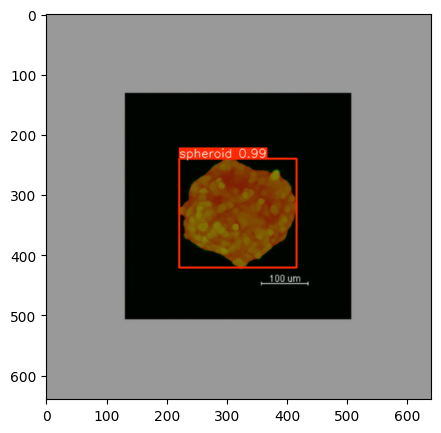

In [13]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(5, 5))
plt.imshow(new_result_array)

In [ ]:
new_result = new_results[0]

In [ ]:
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'spheroid'}
obb: None
orig_img: array([[[153, 153, 153],
        [153, 153, 153],
        [153, 153, 153],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [153, 153, 153]],

       [[153, 153, 153],
        [153, 153, 153],
        [153, 153, 153],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [153, 153, 153]],

       [[153, 153, 153],
        [153, 153, 153],
        [153, 153, 153],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [153, 153, 153]],

       ...,

       [[153, 153, 153],
        [153, 153, 153],
        [153, 153, 153],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [153, 153, 153]],

       [[153, 153, 153],
        [153, 153, 153],
        [153, 153, 153],
        ...,
        [153, 153, 153],
 

In [ ]:
new_result.masks.xyn

[array([[    0.46125,        0.38],
        [       0.46,     0.38125],
        [    0.45875,     0.38125],
        [    0.45625,     0.38375],
        [      0.455,     0.38375],
        [    0.45375,       0.385],
        [    0.45125,       0.385],
        [       0.45,     0.38625],
        [    0.44875,     0.38625],
        [      0.445,        0.39],
        [     0.4425,        0.39],
        [    0.44125,     0.39125],
        [       0.44,     0.39125],
        [       0.44,      0.3925],
        [    0.43875,     0.39375],
        [     0.4375,     0.39375],
        [    0.43625,       0.395],
        [      0.435,       0.395],
        [    0.42875,     0.40125],
        [     0.4275,     0.40125],
        [     0.4225,     0.40625],
        [     0.4225,      0.4075],
        [      0.415,       0.415],
        [    0.41375,       0.415],
        [    0.40875,        0.42],
        [     0.4075,        0.42],
        [    0.40625,     0.42125],
        [      0.405,     0.

In [ ]:
extracted_masks = new_result.masks.data


extracted_masks.shape

torch.Size([1, 800, 800])

In [ ]:
masks_array = extracted_masks.cpu().numpy()

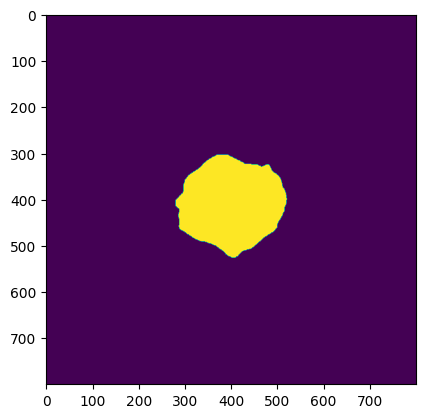

In [ ]:
plt.imshow(masks_array[0])

In [ ]:
class_names = new_result.names.values()
class_names

dict_values(['spheroid'])

In [ ]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

In [ ]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")


Class Name: spheroid, Number of Masks: 1


In [ ]:
spheroid_masks = masks_by_class['spheroid']


In [ ]:
!pip install Pillow

from PIL import Image

# Extract the original image as a NumPy array
orig_img_array = new_result.orig_img

# Convert the NumPy array to a Pillow Image object
orig_img = Image.fromarray(orig_img_array)

# Now you can resize the image
orig_img = orig_img.resize((800, 800), Image.ANTIALIAS)

<ipython-input-37-7c86301124e2>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  orig_img = orig_img.resize((800, 800), Image.ANTIALIAS)


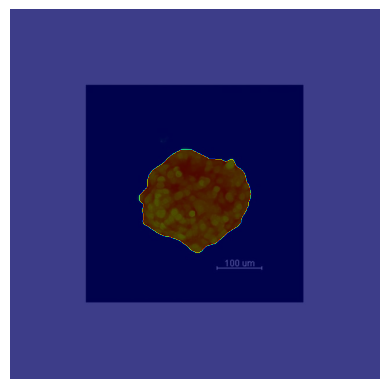

In [ ]:
# Display the original image
plt.imshow(orig_img, cmap='gray')

# Overlay the mask with some transparency
#plt.imshow(alpha_granule_masks[1], cmap='jet', alpha=0.1)
plt.imshow(spheroid_masks[0], cmap='jet', alpha=0.6)
plt.axis('off') # Turn off axis labels
plt.show()

In [ ]:
import os
image_path = '/content/drive/MyDrive/files_spheroid/files_spheroid/Spheroid_segmentation.v2i.yolov8/train/images/10_c_png.rf.080aaca7db005620a6241fccc7ff6e0b.jpg'
directory, filename = os.path.split(image_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')